In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10

<Figure size 1500x1000 with 0 Axes>

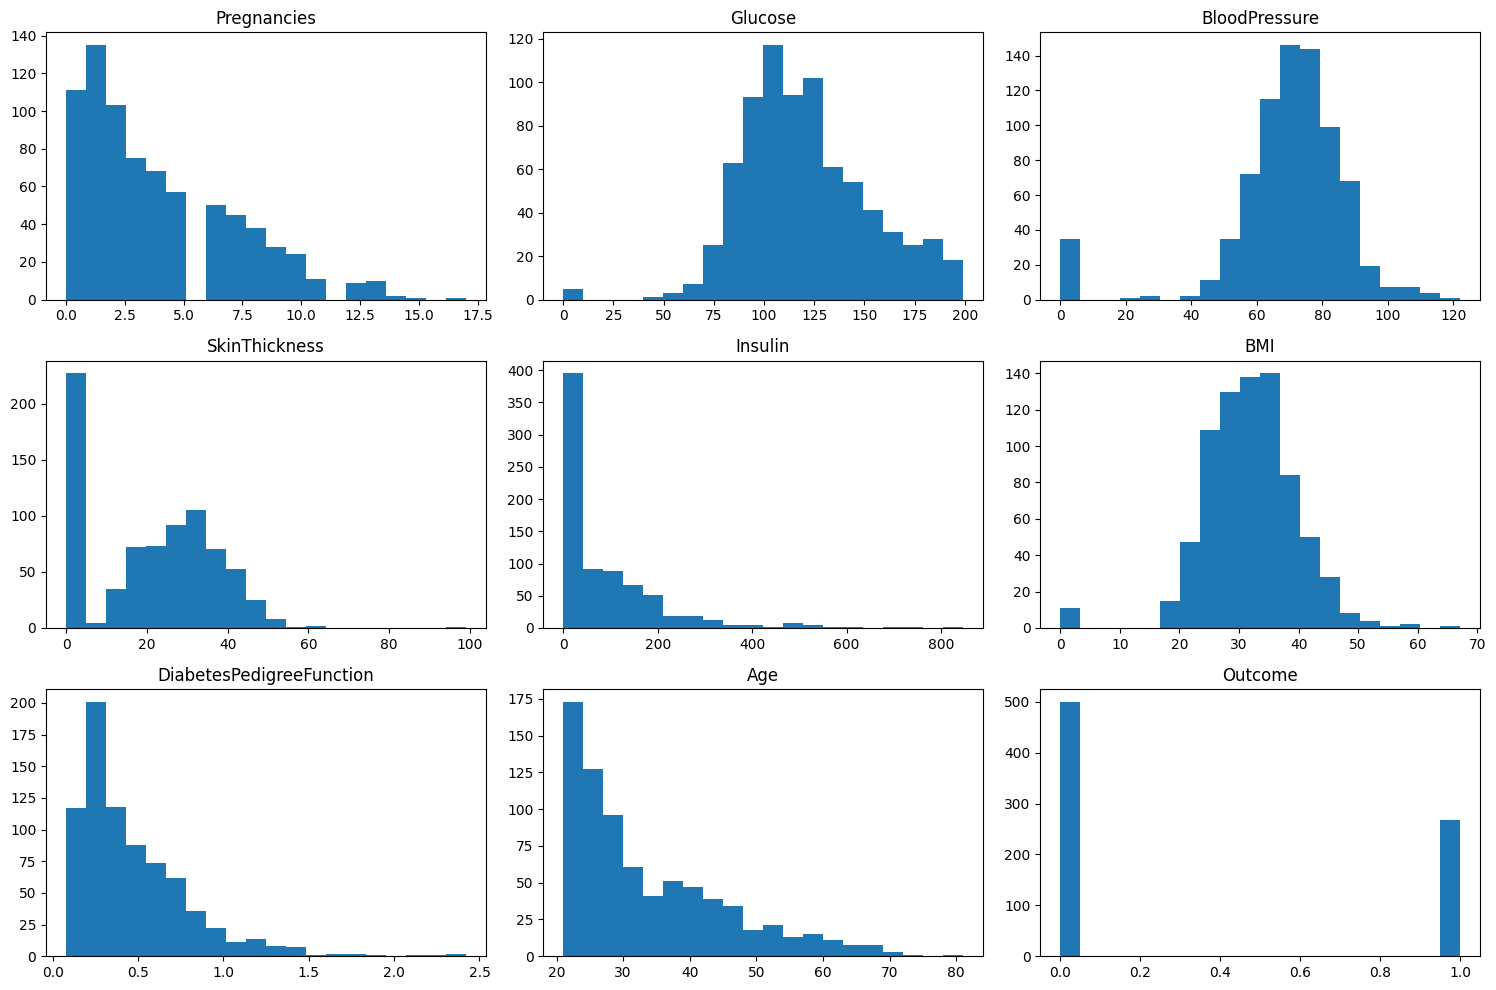

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset dari Pima Indias Diabetes
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pima-diabetes.csv')

# Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# Visualisasi distribusi awal setiap fitur
plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()


Pra-Pemrosesan 2 | Pengecekan Missing Values

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

# Membaca file CSV berdasarkan data df yang sudah dipanggil diatas dan dimasukan ke variable baru
cardata = df

# Menampilkan DataFrame
print("DataFrame:")
print(cardata)

# Menampilkan Jumlah Missing Values per Kolom
print("Jumlah Missing Values per Kolom:")
print(cardata.isnull().sum())

DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1       


Jumlah nilai nol sebelum imputasi:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<ipython-input-4-ca2b6cddcca6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)


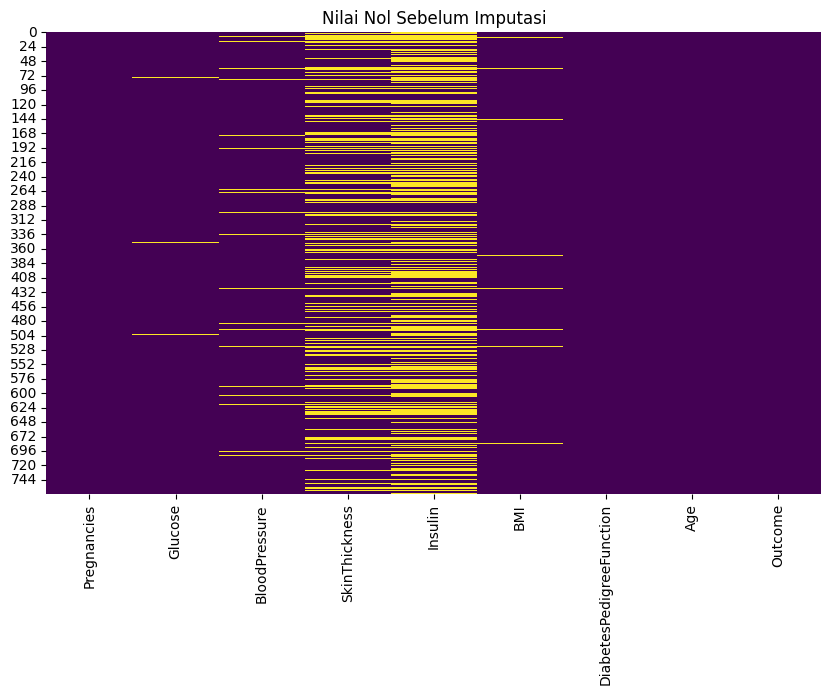


Jumlah nilai nol setelah imputasi:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [4]:
# Identifikasi nilai nol pada kolom tertentu
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nJumlah nilai nol sebelum imputasi:")
print(df[cols_with_zero].isnull().sum())

# Ganti nol dengan NaN
for col in cols_with_zero:
    df[col].replace(0, np.nan, inplace=True)

# Visualisasi nilai nol (sebelum imputasi)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Nilai Nol Sebelum Imputasi")
plt.show()

# Imputasi nilai NaN dengan rata-rata
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

print("\nJumlah nilai nol setelah imputasi:")
print(df[cols_with_zero].isnull().sum())


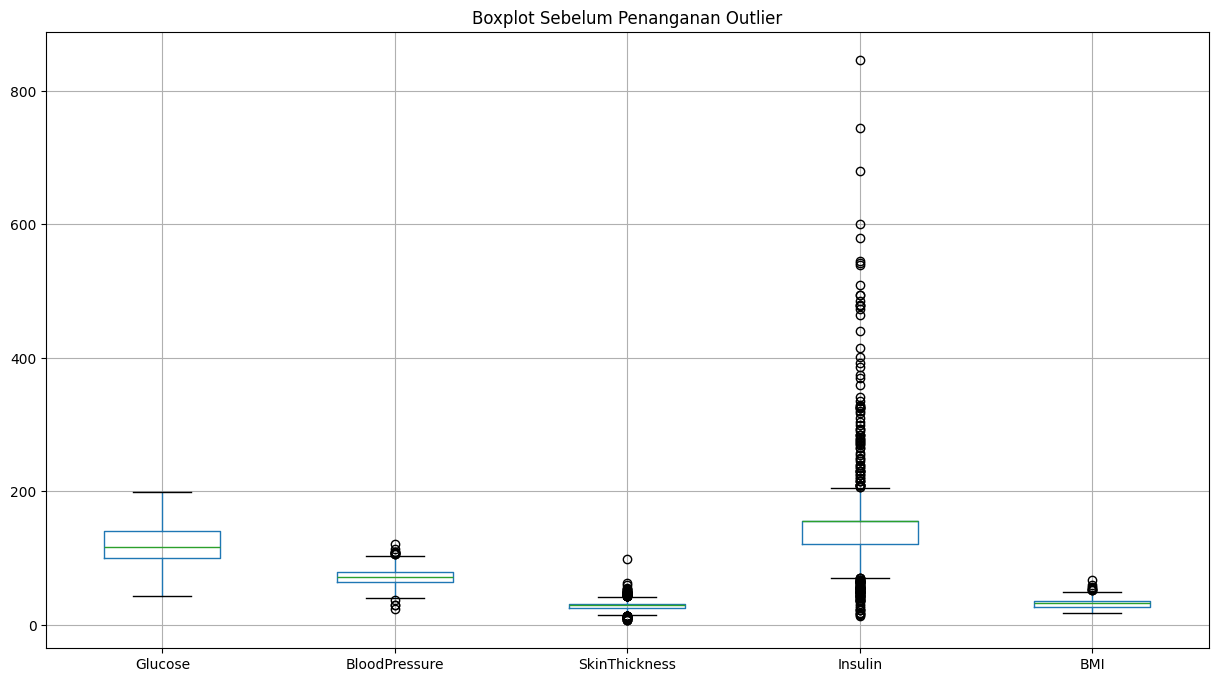

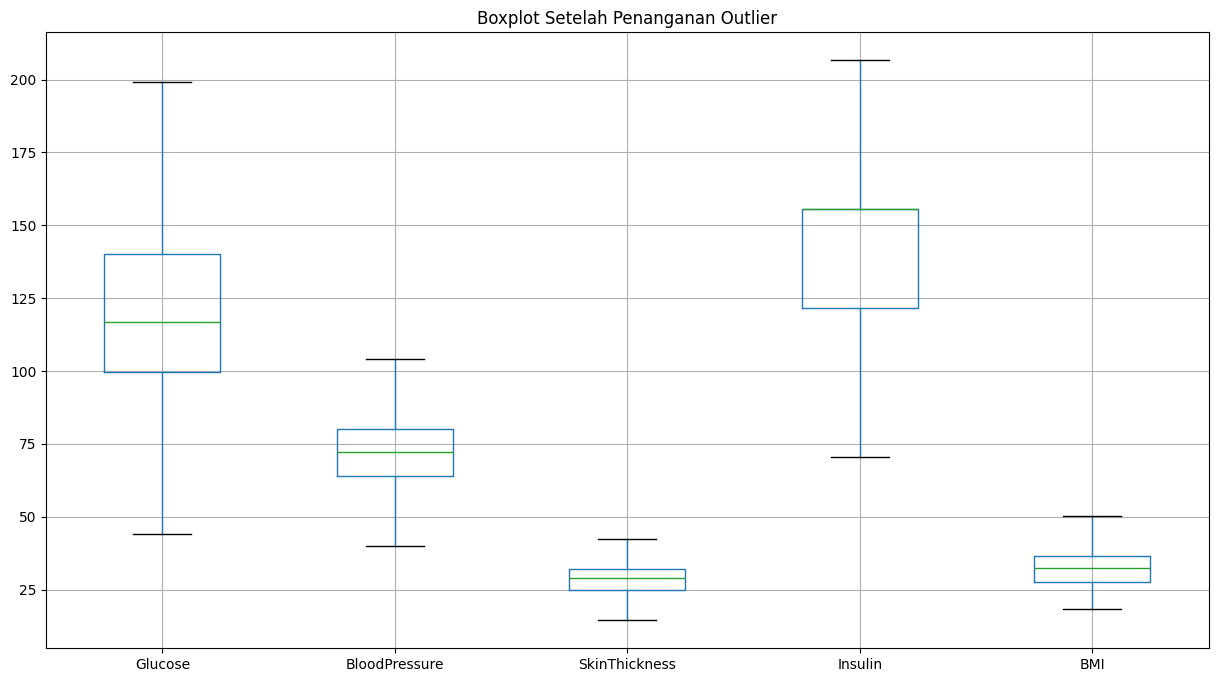

In [5]:
# Visualisasi outlier sebelum penanganan
plt.figure(figsize=(15, 8))
df[cols_with_zero].boxplot()
plt.title("Boxplot Sebelum Penanganan Outlier")
plt.show()

# Deteksi dan menangani outlier menggunakan IQR
for col in cols_with_zero:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Visualisasi setelah penanganan outlier
plt.figure(figsize=(15, 8))
df[cols_with_zero].boxplot()
plt.title("Boxplot Setelah Penanganan Outlier")
plt.show()


<Figure size 1500x1000 with 0 Axes>

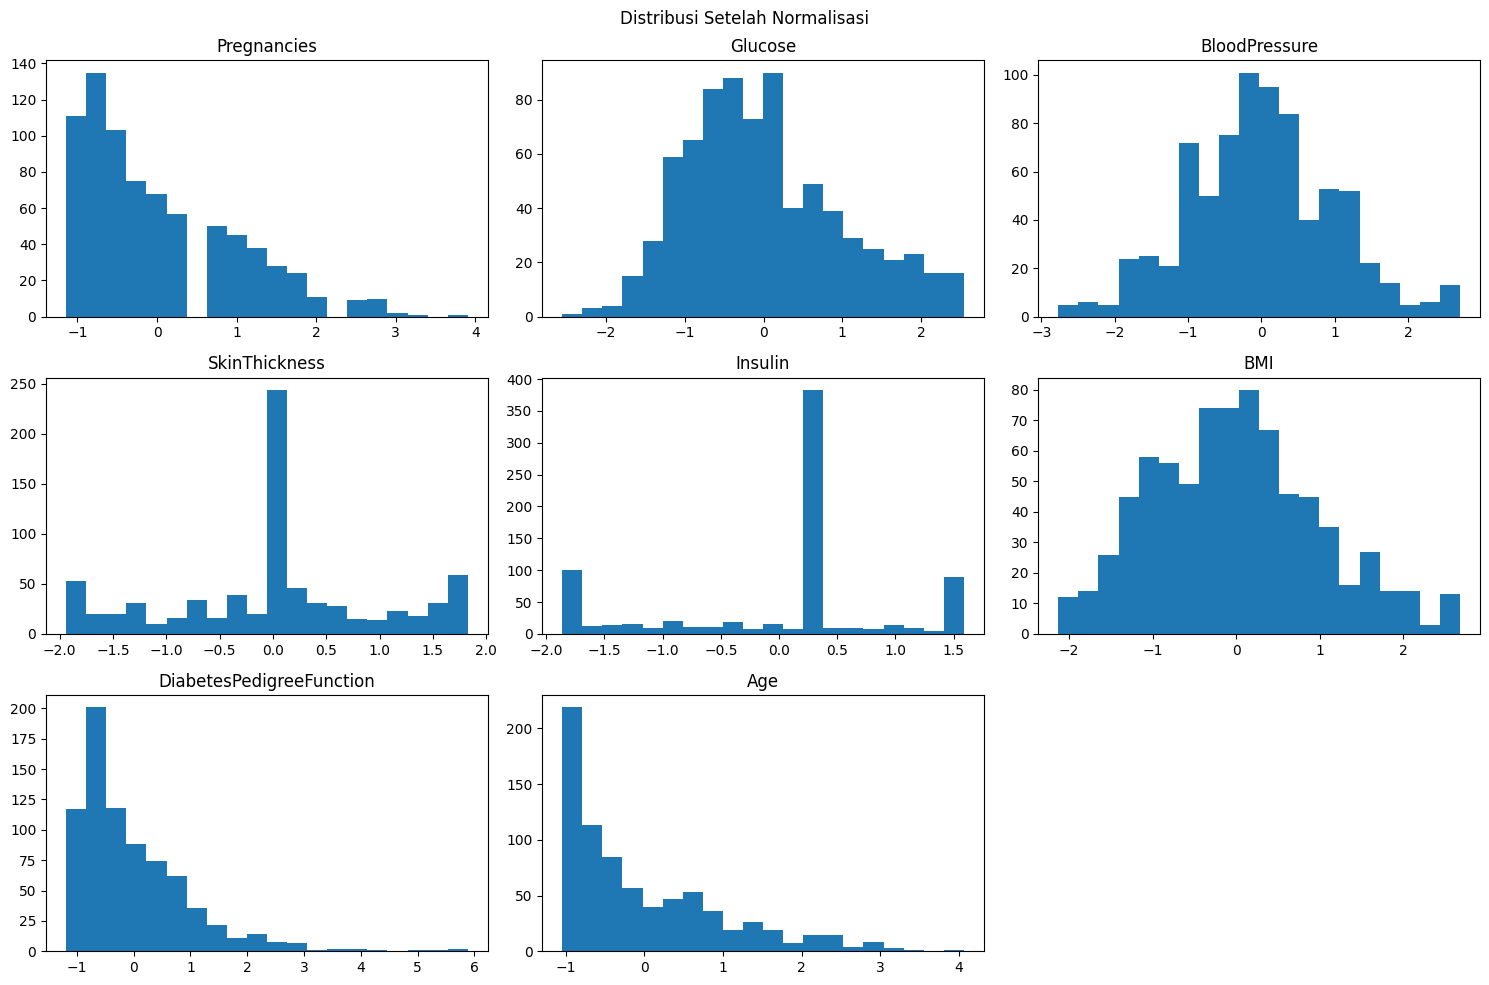

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Outcome', axis=1)), columns=df.columns[:-1])

# Visualisasi distribusi setelah normalisasi
plt.figure(figsize=(15, 10))
df_scaled.hist(bins=20, figsize=(15, 10), grid=False)
plt.suptitle("Distribusi Setelah Normalisasi")
plt.tight_layout()
plt.show()


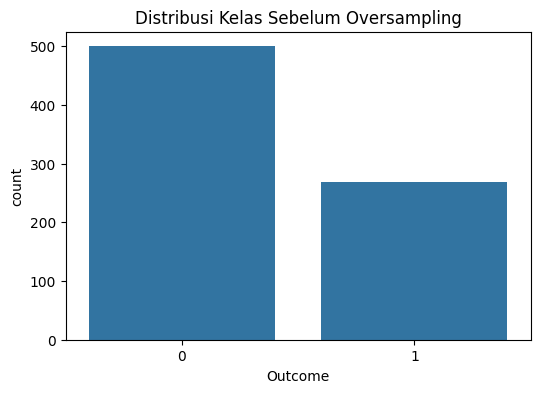

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


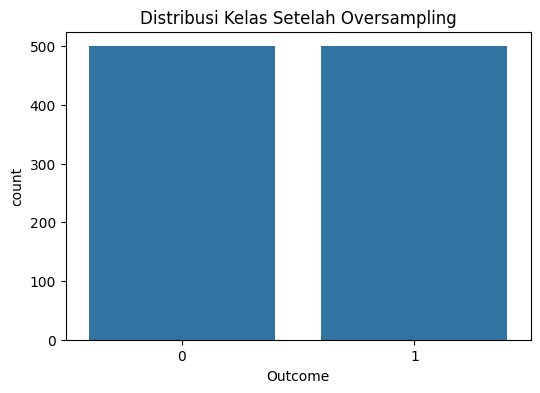

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Visualisasi distribusi kelas sebelum oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Outcome'])
plt.title("Distribusi Kelas Sebelum Oversampling")
plt.show()

# Oversampling dengan SMOTE
X = df.drop('Outcome', axis=1)
y = df['Outcome']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah Oversampling")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"Data latih: {X_train.shape}, Data uji: {X_test.shape}")


Data latih: (800, 8), Data uji: (200, 8)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.78      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



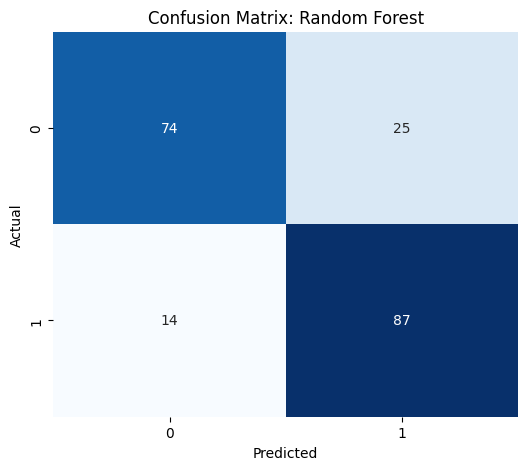

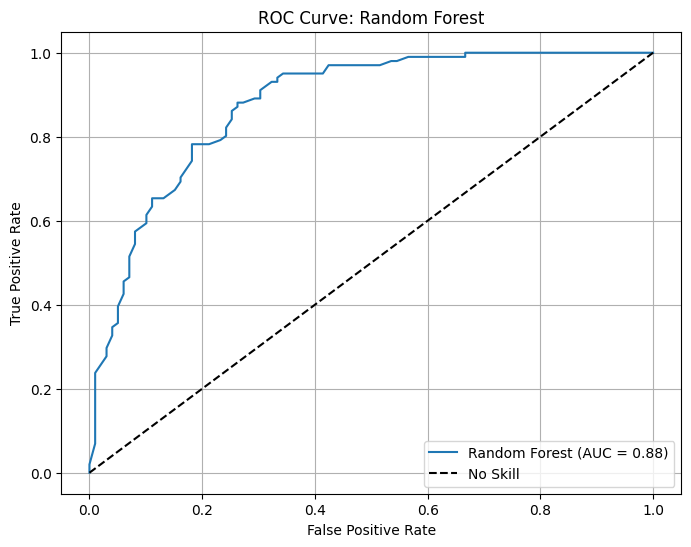

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Pembuatan model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # Jumlah pohon
    max_depth=None,    # Kedalaman pohon tidak dibatasi
    random_state=42,   # Reproducibility
    class_weight="balanced"  # Menangani ketidakseimbangan kelas
)

# Melatih model pada data latih
rf_model.fit(X_train, y_train)

# Prediksi pada data uji
rf_preds = rf_model.predict(X_test)

# Probabilitas untuk ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi model
print("=== Classification Report ===")
print(classification_report(y_test, rf_preds))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Random Forest")
plt.legend()
plt.grid()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Inisiasi Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model dengan .fit()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Accuracy Model Random Forest: {accuracy:.2f}")


Accuracy Model Random Forest: 0.80


In [11]:
# Prediksi pada data test

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1])

In [12]:
y_test

,Outcome
521,0
737,0
740,1
660,0
411,0
...,...
408,1
332,1
208,0
613,0


In [13]:
# Memeriksa antara hasil prediksi dan data aktual

df = pd.DataFrame({'Prediksi': y_pred, 'Aktual': y_test})
df

,Prediksi,Aktual
521,0,0
737,0,0
740,1,1
660,1,0
411,0,0
...,...,...
408,0,1
332,1,1
208,0,0
613,0,0


In [15]:
# prompt: save model

import pickle

# Save the model to a file
with open('diabetes.sav', 'wb') as file:
    pickle.dump(model, file)